In [ ]:
# This script is designed to obtain accuracy of callers for each dataset D1-D6, as well as overall accuracy

# PROGRESS:
# D1: done
# D2: script in progress
# D3: first modify csv's to hold DRB/DBQ predictions -> then use D6 script with slight modifications
# D4: first modify csv's to hold DRB/DBQ predictions -> then use D6 script with slight modifications
# D5: done
# D6: done

# SETUP - run only once

In [23]:
%matplotlib inline
import tarfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sys import ps2

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
caller_list = list() # holds names of all callers
twodig_list = list() # holds 2dig accuracies of all callers
fourdig_list = list() # holds 4dig accuracies of all callers

# Determining accuracy - run once per caller

## Setup

In [24]:
caller_name = input('What is name of caller ')
root1 = '../datasets/'
root2 = '../results/standard/{}'.format(caller_name)
fourdig = 0
twodig = 0
numsamples = 0

What is name of caller arcas


In [18]:
root2

'/content/gdrive/MyDrive/HLA_analysis/MASTER RESULTS DIRECTORY/standard/arcas'

##Dataset 1

In [ ]:
# D1 Accuracy

dir_1 =  root1+"1_gs.csv"
dir_2 =  root2+'_d1.csv'
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions = pre[pre.columns[0]].to_list()

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass

print(index_list)

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = []
pred_set = []

for i in range(0,len(goldstandard)):
  try:
    g = goldstandard[i][1:7]
    p_raw = prediction[index_list[i]][1:7]
    p = list()
  except: 
    pass
  
  for i in p_raw:
    p.append(i[0:7])

  for k in range(0,len(g)):
    gold_set.append(g[k]) # all alleles for the accession number
    pred_set.append(p[k])

print(gold_set)
print(pred_set)
numsamples += len(gold_set)


# 4 digit resolution
hit = 0
#fix this bc it doesn't work because for instance, GS[2] matching with PRE[3] should not work
for i in range(0,len(gold_set)):
  try:
    if gold_set[i] == pred_set[i]:
      hit +=1 
    elif pred_set[i] == gold_set[i-1]:
      hit += 1
    elif pred_set[i] == gold_set[i+1]:
      hit += 1
  except:
    pass

print('4 Digit Accuracy is :' , hit*100/len(pred_set), ' %')
fourdig = fourdig + hit

# 2 digit resolution
hit = 0
for i in range(0,len(gold_set)):
  if gold_set[i][0:4] == pred_set[i][0:4]:
    hit +=1 
  elif pred_set[i][0:4] == gold_set[i-1][0:4]:
    hit += 1
  elif pred_set[i][0:4] == gold_set[i+1][0:4]:
    hit += 1

print('2 Digit Accuracy is :' , hit*100/len(gold_set), ' %')
two_dig = hit*100/len(pred_set)
twodig = twodig + hit

[32, 6, 29, 0, 48, 16, 28, 22, 42, 45, 24, 8, 20, 47, 40, 38, 44, 7, 5, 13, 10, 11, 35, 43, 34, 9, 14, 21, 37, 46, 18, 1, 41, 27, 23, 19, 15, 33, 12, 39, 2, 36, 17, 3, 31, 25, 26, 49, 30, 4]
['A*03:01', 'A*02:01', 'B*07:02', 'B*57:01', 'C*07:02', 'C*06:02', 'A*02:01', 'A*32:01', 'B*40:02', 'B*08:01', 'C*02:02', 'C*07:01', 'A*02:01', 'A*68:01', 'B*44:02', 'B*40:01', 'C*03:04', 'C*07:04', 'A*68:xx', 'A*02:01', 'B*07:02', 'B*15:01', 'C*07:02', 'C*03:03', 'A*03:01', 'A*03:01', 'B*35:03', 'B*35:01', 'C*04:01', 'C*04:01', 'A*26:01', 'A*30:02', 'B*44:02', 'B*18:01', 'C*05:01', 'C*05:01', 'A*24:02', 'A*01:01', 'B*39:06', 'B*08:01', 'C*07:02', 'C*07:01', 'A*25:01', 'A*03:01', 'B*08:01', 'B*18:01', 'C*07:01', 'C*12:03', 'A*24:02', 'A*01:01', 'B*40:01', 'B*08:01', 'C*03:04', 'C*07:01', 'A*02:01', 'A*02:01', 'B*44:02', 'B*15:01', 'C*05:01', 'C*03:04', 'A*02:01', 'A*02:01', 'B*14:02', 'B*14:01', 'C*08:02', 'C*08:02', 'A*01:01', 'A*03:01', 'B*08:01', 'B*07:02', 'C*07:01', 'C*07:02', 'A*32:01', 'A*02

## Dataset 2

In [ ]:
# Run for D2 accuracy (WORK IN PROGRESS)

dir_1 =  root1+"2_gs_corrected.csv"
dir_2 =  root2+"_d2.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions = pre[pre.columns[0]].to_list()

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass

print(index_list)

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = []
pred_set = []

for i in range(0,len(goldstandard)):
  try:
    g = goldstandard[i][1:7]
    p_raw = prediction[index_list[i]][1:7]
    p = list()
  except: 
    pass
  
  for i in p_raw:
    p.append(i[0:7])

  for k in range(0,len(g)):
    gold_set.append(g[k]) # all alleles for the accession number
    pred_set.append(p[k])

print(gold_set)
print(pred_set)
numsamples += len(gold_set)
# 4 digit resolution
hit = 0
#fix this bc it doesn't work because for instance, GS[2] matching with PRE[3] should not work
for i in range(0,len(gold_set)):
  try:
    if '/' in gold_set[i]:
      #sample_list=gold_set[i].split('/')
      if pred_set[i] in gold_set[i].split('/'):
        hit +=1 
      elif pred_set[i] in gold_set[i-1].split('/'):
        hit += 1
      elif pred_set[i] in gold_set[i+1].split('/'):
        hit += 1
    else:
      if gold_set[i] == pred_set[i]:
        hit +=1 
      elif pred_set[i] == gold_set[i-1]:
        hit += 1
      elif pred_set[i] == gold_set[i+1]:
        hit += 1
  except:
    pass

print('4 Digit Accuracy is :' , hit*100/len(pred_set), ' %')
fourdig = fourdig + hit


[]


NameError: ignored

In [ ]:
# DATASET 2 - OLD (SEE ABOVE FOR UPDATED!)

dir_1 =  root1+"2_gs_corrected.csv"
dir_2 =  root2+"_d2.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions = pre[pre.columns[0]].to_list()

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass

print(index_list)

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = []
pred_set = []

for i in range(0,len(goldstandard)):
  try:
    g = goldstandard[i][1:7]
    p_raw = prediction[index_list[i]][1:7]
    p = list()
  except: 
    pass
  
  for i in p_raw:
    p.append(i[0:7])

  for k in range(0,len(g)):
    gold_set.append(g[k]) # all alleles for the accession number
    pred_set.append(p[k])

print(gold_set)
print(pred_set)
numsamples += len(gold_set)

# 4 digit resolution
hit = 0
#fix this bc it doesn't work because for instance, GS[2] matching with PRE[3] should not work
for i in range(0,len(gold_set)):
  try:
    if gold_set[i] == pred_set[i]:
      hit +=1 
    elif pred_set[i] == gold_set[i-1]:
      hit += 1
    elif pred_set[i] == gold_set[i+1]:
      hit += 1
  except:
    pass

print('4 Digit Accuracy is :' , hit*100/len(pred_set), ' %')
fourdig = fourdig + hit

# 2 digit resolution
hit = 0
for i in range(0,len(gold_set)):
  if gold_set[i][0:4] == pred_set[i][0:4]:
    hit +=1 
  elif pred_set[i][0:4] == gold_set[i-1][0:4]:
    hit += 1
  elif pred_set[i][0:4] == gold_set[i+1][0:4]:
    hit += 1

print('2 Digit Accuracy is :' , hit*100/len(gold_set), ' %')
two_dig = hit*100/len(pred_set)
twodig = twodig + hit

[321, 117, 13, 418, 310, 109, 250, 336, 452, 100, 252, 31, 129, 297, 234, 124, 441, 347, 244, 104, 20, 433, 292, 240, 331, 120, 230, 5, 158, 307, 422, 255, 103, 212, 464, 376, 412, 257, 57, 351, 95, 196, 361, 480, 393, 39, 190, 467, 367, 475, 203, 96, 186, 396, 279, 72, 220, 373, 458, 52, 166, 204, 40, 394, 360, 195, 273, 58, 168, 258, 413, 375, 463, 81, 211, 385, 287, 306, 157, 4, 231, 121, 454, 332, 27, 291, 19, 143, 245, 348, 442, 145, 298, 130, 251, 99, 451, 335, 1, 154, 311, 148, 116, 235, 320, 137, 15, 64, 400, 270, 470, 223, 70, 277, 397, 45, 182, 283, 380, 485, 85, 207, 264, 387, 174, 91, 484, 349, 55, 171, 271, 407, 62, 159, 77, 224, 469, 194, 35, 192, 389, 365, 478, 93, 199, 408, 169, 411, 259, 378, 80, 284, 388, 7, 122, 229, 25, 436, 289, 140, 24, 242, 107, 444, 343, 9, 147, 300, 427, 28, 131, 254, 339, 449, 153, 2, 415, 313, 149, 11, 237, 115, 323, 17, 135, 66, 269, 402, 371, 71, 221, 178, 49, 384, 282, 488, 353, 205, 265, 285, 386, 43, 89, 209, 352, 482, 59, 406, 60, 226, 

IndexError: ignored

## Dataset 3

In [ ]:
# d3 accuracy - DRB only
# TODO

## Dataset 4

In [7]:
prediction[1][1:7]

array(['DRB1*01:01', 'DRB1*13:01'], dtype=object)

In [6]:
pre_accessions

['SRR5252846Aligned',
 'SRR5252837Aligned',
 'SRR5252862Aligned',
 'SRR5252851Aligned',
 'SRR5252844Aligned',
 'SRR5252835Aligned',
 'SRR5252855Aligned',
 'SRR5252853Aligned',
 'SRR5252860Aligned',
 'SRR5252845Aligned',
 'SRR5252843Aligned',
 'SRR5252859Aligned',
 'SRR5252839Aligned',
 'SRR5252861Aligned']

In [8]:
index_list

[]

In [30]:
gs_accessions

['SRR5252835',
 'SRR5252837',
 'SRR5252839',
 'SRR5252843',
 'SRR5252844',
 'SRR5252845',
 'SRR5252846',
 'SRR5252851',
 'SRR5252853',
 'SRR5252855',
 'SRR5252859',
 'SRR5252860',
 'SRR5252861',
 'SRR5252862']

In [29]:
pre_accessions

['SRR5252846',
 'SRR5252837',
 'SRR5252862',
 'SRR5252851',
 'SRR5252844',
 'SRR5252835',
 'SRR5252855',
 'SRR5252853',
 'SRR5252860',
 'SRR5252845',
 'SRR5252843',
 'SRR5252859',
 'SRR5252839',
 'SRR5252861']

In [39]:
# d4 accuracy - DRB1 only 

dir_1 =  root1+"4_gs_corrected.csv"
dir_2 =  root2+"_d4.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)
pre=pre.set_index(pre.columns[0])
mask = pre.apply(lambda col: col.str.contains('DRB1').any(),
                axis=0)
pre=pre.loc[: , mask]
pre=pre.reset_index()
pre.dropna()
twodig_hit = 0
fourdig_hit = 0
# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions = pre[pre.columns[0]].to_list()

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass

print(index_list)

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = []
pred_set = []

for i in range(0,len(goldstandard)):
  try:
    g = goldstandard[i][1:7]
    p_raw = prediction[index_list[i]][1:7]
    p = list()
  except: 
    pass
  
  for i in p_raw:
    p.append(i[0:7])

  for k in range(0,len(g)):
    gold_set.append(g[k]) # all alleles for the accession number
    pred_set.append(p[k])

print(gold_set)
print(pred_set)
numsamples += len(gold_set)


# 4 digit resolution
hit = 0
#fix this bc it doesn't work because for instance, GS[2] matching with PRE[3] should not work
for i in range(0,len(gold_set)):
  try:
    if gold_set[i] == pred_set[i]:
      hit +=1 
    elif pred_set[i] == gold_set[i-1]:
      hit += 1
    elif pred_set[i] == gold_set[i+1]:
      hit += 1
  except:
    pass

print('4 Digit Accuracy is :' , hit*100/len(pred_set), ' %')
fourdig = fourdig + hit

# 2 digit resolution
hit = 0
for i in range(0,len(gold_set)):
  if gold_set[i][0:4] == pred_set[i][0:4]:
    hit +=1 
  elif pred_set[i][0:4] == gold_set[i-1][0:4]:
    hit += 1
  elif pred_set[i][0:4] == gold_set[i+1][0:4]:
    hit += 1

print('2 Digit Accuracy is :' , hit*100/len(gold_set), ' %')
two_dig = hit*100/len(pred_set)
twodig = twodig + hit

[5, 1, 12, 10, 4, 9, 0, 3, 7, 6, 11, 8, 13, 2]


TypeError: ignored

In [37]:
pre.dropna()

,subject,DRB11,DRB12
1,SRR5252837,DRB1*01:01,DRB1*13:01
9,SRR5252845,DRB1*15:01,DRB1*13:01


In [7]:
# d4 accuracy - DRB1 only 

dir_1 =  root1+"4_gs_corrected.csv"
dir_2 =  root2+"_d4.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)
pre=pre.set_index(pre.columns[0])
mask = pre.apply(lambda col: col.str.contains('DRB1').any(),
                axis=0)
pre=pre.loc[: , mask]
pre=pre.reset_index()
twodig_hit = 0
fourdig_hit = 0

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions_raw = pre[pre.columns[0]].to_list()
pre_accessions = list()
for i in pre_accessions_raw:
  pre_accessions.append(i[0:10])
print(pre_accessions)

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass

print(index_list)
numsamples += len(index_list)

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = gs[gs.columns[1]].to_list();
pred_set = []

for i in range(0,len(index_list)):
  p_raw = prediction[index_list[i]][1:3] #select C alleles only
  for i in p_raw:
    try: pred_set.append(i[0:7])
    except: pred_set.append('Z*00:00')

print(pred_set)
print(gold_set)


for i in range(8):
  if (pred_set[2*i][0:7] == gold_set[i]) or pred_set[2*i+1][0:7] == gold_set[i][0:7]:
    fourdig_hit +=1 
  if (pred_set[2*i][0:4] == gold_set[i][0:4]) or pred_set[2*i+1][0:4] == gold_set[i][0:4]:
    twodig_hit +=1 

print('4 Digit Accuracy is :' , fourdig_hit*100/8, ' %')
fourdig = fourdig + fourdig_hit

print('2 Digit Accuracy is :' , twodig_hit*100/8, ' %')
two_dig = twodig_hit*100/len(pred_set)
twodig = twodig + twodig_hit

# TODO

['SRR5252846', 'SRR5252837', 'SRR5252862', 'SRR5252851', 'SRR5252844', 'SRR5252835', 'SRR5252855', 'SRR5252853', 'SRR5252860', 'SRR5252845', 'SRR5252843', 'SRR5252859', 'SRR5252839', 'SRR5252861']
[]
[]
['SRR5252835', 'SRR5252837', 'SRR5252839', 'SRR5252843', 'SRR5252844', 'SRR5252845', 'SRR5252846', 'SRR5252851', 'SRR5252853', 'SRR5252855', 'SRR5252859', 'SRR5252860', 'SRR5252861', 'SRR5252862']


IndexError: ignored

## D5 Accuracy

In [5]:
caller_list = list() # holds names of all callers
twodig_list = list() # holds 2dig accuracies of all callers
fourdig_list = list() # holds 4dig accuracies of all callers

In [4]:
# Run for d5 accuracy: monoallelic A and B only 
# i just brute force this for now because there are only 4 samples 

dir_1 =  root1+"5_gs.csv"
dir_2 =  root2+"_d5.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)
pre=pre.set_index(pre.columns[0])
mask = pre.apply(lambda col: col.str.contains('A|B').any(),
                axis=0)
pre=pre.loc[: , mask]
pre=pre.reset_index()

twodig_hit = 0
fourdig_hit = 0

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions_raw = pre[pre.columns[0]].to_list()
pre_accessions = list()
for i in pre_accessions_raw:
  pre_accessions.append(i[0:10])
print(pre_accessions)

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass

print(index_list)
numsamples += len(index_list)

# constructing standardized, stripped list of all alleles 
prediction = pre.values
pred_set = []

for i in range(0,len(index_list)):
  p_raw = prediction[index_list[i]][1:5]
  for i in p_raw:
    try: pred_set.append(i[0:7])
    except: pred_set.append('Z*00:00')

print(pred_set)

#sample 1
if (pred_set[0][0:7] == 'A*29:02') or pred_set[1][0:7] == 'A*29:02':
  fourdig_hit +=1 
if (pred_set[0][0:4] == 'A*29') or pred_set[1][0:4] == 'A*29':
  twodig_hit +=1 

#sample 2
if (pred_set[6][0:7] == 'B*51:01') or pred_set[7][0:7] == 'B*51:01':
  fourdig_hit += 1
if (pred_set[6][0:4] == 'B*51') or pred_set[7][0:4] == 'B*51':
  twodig_hit += 1

#sample 3
if (pred_set[10][0:7] == 'B*54:01') or pred_set[11][0:7] == 'B*54:01':
  fourdig_hit += 1
if (pred_set[10][0:4] == 'B*54') or pred_set[11][0:4] == 'B*54':
  twodig_hit += 1

#sample 4
if (pred_set[14][0:7] == 'B*57:01') or pred_set[15][0:7] == 'B*57:01':
  fourdig_hit += 1
if (pred_set[14][0:4] == 'B*57') or pred_set[15][0:4] == 'B*57':
  twodig_hit += 1
      

print('4 Digit Accuracy is :' , fourdig_hit*100/4, ' %')
fourdig = fourdig + fourdig_hit

print('2 Digit Accuracy is :' , twodig_hit*100/4, ' %')
two_dig = twodig_hit*100/len(pred_set)
twodig = twodig + twodig_hit

['GSM2450856', 'GSM2450857', 'GSM2450858', 'GSM2450855']
[3, 0, 1, 2]
['A*29:02', 'A*29:02', 'B*07:34', 'B*44:02', 'A*11:36', 'A*33:01', 'B*51:01', 'B*51:01', 'Z*00:00', 'Z*00:00', 'B*54:01', 'B*54:01', 'A*24:02', 'A*31:20', 'B*57:01', 'B*57:01']
4 Digit Accuracy is : 100.0  %
2 Digit Accuracy is : 100.0  %


## D6 Accuracy

In [3]:
# run for d6 accuracy: monoallelic C only

dir_1 =  root1+"6_gs.csv"
dir_2 =  root2+"_d6.csv"
gs = pd.read_csv(dir_1)
pre = pd.read_csv(dir_2)
pre=pre.set_index(pre.columns[0])
mask = pre.apply(lambda col: col.str.contains('C').any(),
                axis=0)
pre=pre.loc[: , mask]
pre=pre.reset_index()
twodig_hit = 0
fourdig_hit = 0

# Put in dictionary with key pointing to 6 values
index_list = list()

gs_accessions = gs[gs.columns[0]].to_list()
pre_accessions_raw = pre[pre.columns[0]].to_list()
pre_accessions = list()
for i in pre_accessions_raw:
  pre_accessions.append(i[0:10])
print(pre_accessions)

for i in gs_accessions:
  try: index_list.append( pre_accessions.index(i) )
  except: pass

print(index_list)
numsamples += len(index_list)

# constructing standardized, stripped list of all alleles 
goldstandard = gs.values
prediction = pre.values

gold_set = gs[gs.columns[1]].to_list();
pred_set = []

for i in range(0,len(index_list)):
  p_raw = prediction[index_list[i]][1:3] #select C alleles only
  for i in p_raw:
    try: pred_set.append(i[0:7])
    except: pred_set.append('Z*00:00')

print(pred_set)
print(gold_set)


for i in range(8):
  if (pred_set[2*i][0:7] == gold_set[i]) or pred_set[2*i+1][0:7] == gold_set[i][0:7]:
    fourdig_hit +=1 
  if (pred_set[2*i][0:4] == gold_set[i][0:4]) or pred_set[2*i+1][0:4] == gold_set[i][0:4]:
    twodig_hit +=1 

print('4 Digit Accuracy is :' , fourdig_hit*100/8, ' %')
fourdig = fourdig + fourdig_hit

print('2 Digit Accuracy is :' , twodig_hit*100/8, ' %')
two_dig = twodig_hit*100/len(pred_set)
twodig = twodig + twodig_hit

['GSM3768246', 'GSM3768251', 'GSM3768247', 'GSM3768250', 'GSM3768244', 'GSM3768249', 'GSM3768245', 'GSM3768248']
[4, 6, 0, 2, 7, 5, 3, 1]
['C*04:01', 'C*04:01', 'C*04:01', 'C*04:01', 'C*04:01', 'C*04:01', 'C*04:01', 'C*04:01', 'C*07:01', 'C*07:01', 'C*07:01', 'C*07:01', 'C*07:01', 'C*07:01', 'C*07:01', 'C*07:01']
['C*04:01', 'C*04:01', 'C*04:01', 'C*04:01', 'C*07:01', 'C*07:01', 'C*07:01', 'C*07:01']
4 Digit Accuracy is : 100.0  %
2 Digit Accuracy is : 100.0  %


#Ploting Accuracy

## Overall Accuracy Plot

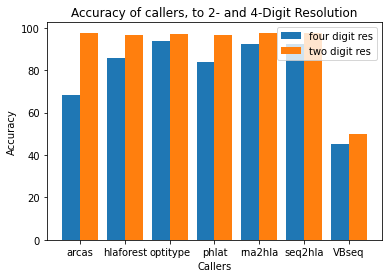

In [ ]:
#graph creation. only run once once all data is collected
X_axis = np.arange(len(caller_list))
plt.bar(X_axis - 0.2, fourdig_list, 0.4, label = 'four digit res')
plt.bar(X_axis + 0.2, twodig_list, 0.4, label = 'two digit res')
plt.xticks(X_axis, caller_list)
plt.xlabel('Callers')
plt.ylabel('Accuracy')
plt.title('Accuracy of callers, to 2- and 4-Digit Resolution')
plt.legend()

## D1 Accuracy Plot

In [ ]:
import seaborn as sns

In [ ]:
d1_caller_list=caller_list
d1_twodig_list=twodig_list
d1_fourdig_list=fourdig_list

NameError: ignored

In [ ]:
df1=pd.DataFrame(np.column_stack([d1_caller_list,d1_twodig_list,d1_fourdig_list]), 
                               columns=['Callers','Two Digits', 'Four Digit'])

In [ ]:
df1

,Callers,Two Digits,Four Digit
0,arcas,97.66666666666667,68.33333333333333
1,hlaforest,96.66666666666667,85.66666666666667
2,optitype,97.0,93.66666666666667
3,phlat,96.66666666666667,83.66666666666667
4,rna2hla,97.66666666666667,92.33333333333333
5,seq2hla,97.66666666666667,92.33333333333333
6,VBseq,50.0,45.333333333333336


In [ ]:
df1=df1.melt(id_vars='Callers').rename(columns=str.title)

In [ ]:
df1['Value'] = df1['Value'].astype(float)

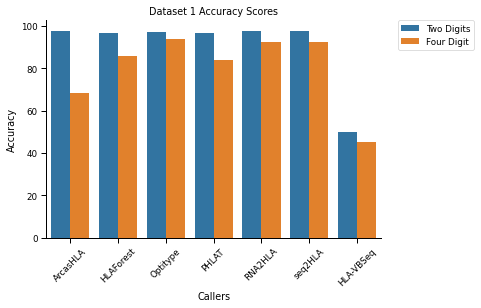

In [ ]:
sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.barplot(x='Callers',y='Value', hue='Variable', data=df1)
ax.set_xticklabels(['ArcasHLA', 'HLAForest', 'Optitype','PHLAT','RNA2HLA','seq2HLA','HLA-VBSeq'],rotation=45)
# Put the legend out of the figure
ax.set_ylabel("Accuracy")
ax.set_title("Dataset 1 Accuracy Scores") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('../Figures/d1_accuracy.png',bbox_inches ="tight",dpi=300)

## D5 Accuracy Plot

In [ ]:
d5_caller_list=caller_list
d5_twodig_list=twodig_list
d5_fourdig_list=fourdig_list
df5=pd.DataFrame(np.column_stack([d5_caller_list,d5_twodig_list,d5_fourdig_list]), 
                               columns=['Callers','Two Digits', 'Four Digit'])
df6=df6.melt(id_vars='Callers').rename(columns=str.title)
df5['Value'] = df5['Value'].astype(float)

In [ ]:
sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.barplot(x='Callers',y='Value', hue='Variable', data=df5)
#ax.set_xticklabels(['ArcasHLA', 'HLAForest', 'Optitype','PHLAT','RNA2HLA','seq2HLA','HLA-VBSeq'],rotation=45)
# Put the legend out of the figure
ax.set_ylabel("Accuracy")
ax.set_title("Dataset 1 Accuracy Scores") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('../Figures/d5_accuracy.png',bbox_inches ="tight")

## D6 Accuracy Plot

In [ ]:
d6_caller_list=caller_list
d6_twodig_list=twodig_list
d6_fourdig_list=fourdig_list
df6=pd.DataFrame(np.column_stack([d6_caller_list,d6_twodig_list,d6_fourdig_list]), 
                               columns=['Callers','Two Digits', 'Four Digit'])
df6=df6.melt(id_vars='Callers').rename(columns=str.title)
df6['Value'] = df6['Value'].astype(float)

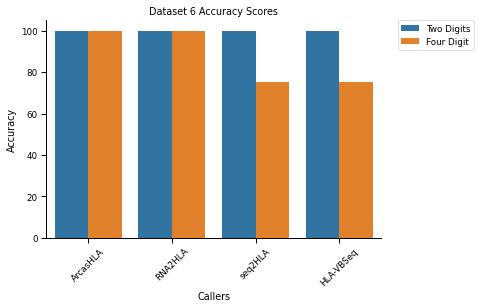

In [ ]:
sns.set_context("paper")
sns.color_palette("pastel")
ax=sns.barplot(x='Callers',y='Value', hue='Variable', data=df6)
ax.set_xticklabels(['ArcasHLA','RNA2HLA','seq2HLA','HLA-VBSeq'],rotation=45)
# Put the legend out of the figure
ax.set_ylabel("Accuracy")
ax.set_title("Dataset 6 Accuracy Scores") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.savefig('../Figures/d6_accuracy.png',bbox_inches ="tight")